In [73]:
import os
import pandas as pd
from umap import UMAP
import seaborn as sns
from dataset.dataset_representation import process_dataset

import matplotlib.pyplot as plt

In [74]:
OUTPUT_DIR = "representation_dir"

## Gathering the representation for BBBP

In [75]:
bbbp_split, bbbp_mole_2k = process_dataset("./data/benchmark_data/bbbp/BBBP.csv",
                                                         "gin_concat",
                                                         "gin_concat_R1000_E2000",
                                                         "scaffold",
                                                         0.1,
                                                         0.1)

About to generate scaffolds
About to sort in scaffold sets
./ckpt/gin_concat_R1000_E2000/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnns.3.mlp.1.weight
gnns.3.mlp.1.bias

In [76]:
_, bbbp_mole_8kle3 = process_dataset("./data/benchmark_data/bbbp/BBBP.csv",
                                                         "gin_concat",
                                                         "gin_concat_R1000_E8000_lambda0.0001_16.Mar.2023_07.00.00",
                                                         "scaffold",
                                                         0.1,
                                                         0.1)


About to generate scaffolds
About to sort in scaffold sets
./ckpt/gin_concat_R1000_E8000_lambda0.0001_16.Mar.2023_07.00.00/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias
gnn

In [77]:
_, bbbp_mole_ecfp4 = process_dataset("./data/benchmark_data/bbbp/BBBP.csv",
                                                         "ECFP4",
                                                         None,
                                                         "scaffold",
                                                         0.1,
                                                         0.1)


About to generate scaffolds
About to sort in scaffold sets


In [78]:
os.makedirs(os.path.join(OUTPUT_DIR, "bbbp"), exist_ok=True)
bbbp_split.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbb_split.csv"), index=False)

bbbp_mole_2k.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_2k.csv"), index=True)
bbbp_mole_8kle3.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_8kle3.csv"), index=True)
bbbp_mole_ecfp4.to_csv(os.path.join(OUTPUT_DIR, "bbbp", "bbbp_mole_ecfp4.csv"), index=True)

In [79]:
bbbp_split_classes = bbbp_split[["chem_id", "p_np"]].set_index("chem_id")

/home/roberto_olayo/miniconda3/envs/molclr/lib/python3.7/site-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


<AxesSubplot:xlabel='umap1', ylabel='umap2'>

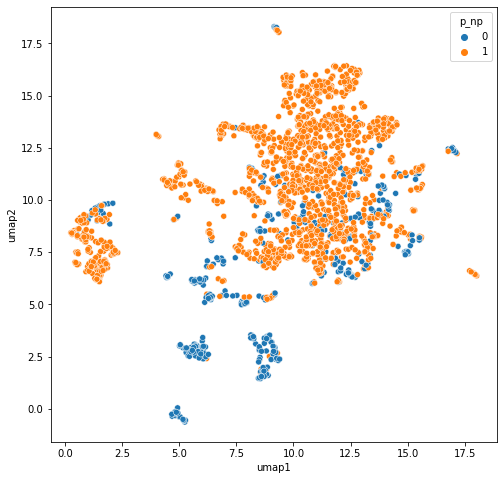

In [80]:
reducer = UMAP(random_state=42, n_components=2, n_neighbors=10, min_dist=0.3, metric="jaccard")

embedding = reducer.fit_transform(bbbp_mole_ecfp4.values)

ecfp4_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bbbp_mole_ecfp4.index)
                          
ecfp4_umap = ecfp4_umap.join(bbbp_split_classes)                          
ecfp4_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=ecfp4_umap, x="umap1", y="umap2", hue="p_np")

<AxesSubplot:xlabel='umap1', ylabel='umap2'>

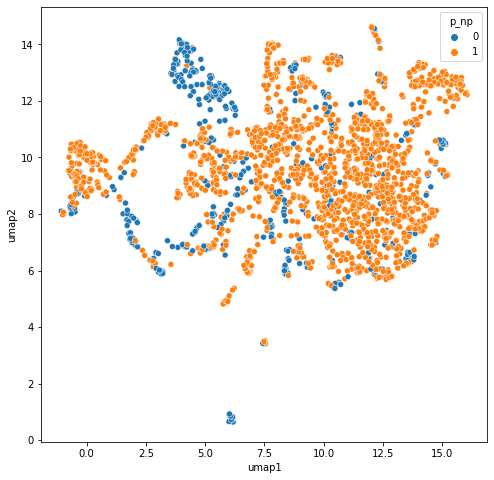

In [81]:

reducer = UMAP(random_state=42, n_components=2, n_neighbors=10, min_dist=0.3, metric="cosine")

embedding = reducer.fit_transform(bbbp_mole_2k.values)

gbt2k_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bbbp_mole_2k.index)
                          
gbt2k_umap = gbt2k_umap.join(bbbp_split_classes)                          
gbt2k_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=gbt2k_umap, x="umap1", y="umap2", hue="p_np")

In [82]:
ecfp4_umap["representation"] = "ECFP4"
ecfp4_umap["dataset"] = "BBBP"
ecfp4_umap = ecfp4_umap.reset_index()

gbt2k_umap["representation"] = "MolE"
gbt2k_umap["dataset"] = "BBBP"
gbt2k_umap = gbt2k_umap.reset_index()

bbbp_umap = pd.concat([ecfp4_umap, gbt2k_umap])
bbbp_umap.rename(columns={"p_np": "Class"}, inplace=True)

bbbp_umap.head()

,index,umap1,umap2,Class,representation,dataset
0,chem_0,13.229012,6.912014,1,ECFP4,BBBP
1,chem_1,11.129953,7.818325,1,ECFP4,BBBP
2,chem_2,17.112797,12.290708,1,ECFP4,BBBP
3,chem_3,12.010386,10.311732,1,ECFP4,BBBP
4,chem_4,5.063502,3.016152,1,ECFP4,BBBP


## BACE

In [83]:
bace_split, bace_mole_8kle3 = process_dataset("./data/benchmark_data/bace/bace.csv",
                                                         "gin_concat",
                                                         "gin_concat_R1000_E8000_lambda0.0001_19.May.2023_09.55.37_1M/",
                                                         "scaffold",
                                                         0.1,
                                                         0.1)

About to generate scaffolds
About to sort in scaffold sets
./ckpt/gin_concat_R1000_E8000_lambda0.0001_19.May.2023_09.55.37_1M/checkpoints/model.pth
x_embedding1.weight
x_embedding2.weight
gnns.0.mlp.0.weight
gnns.0.mlp.0.bias
gnns.0.mlp.1.weight
gnns.0.mlp.1.bias
gnns.0.mlp.1.running_mean
gnns.0.mlp.1.running_var
gnns.0.mlp.1.num_batches_tracked
gnns.0.mlp.3.weight
gnns.0.mlp.3.bias
gnns.0.edge_embedding1.weight
gnns.0.edge_embedding2.weight
gnns.1.mlp.0.weight
gnns.1.mlp.0.bias
gnns.1.mlp.1.weight
gnns.1.mlp.1.bias
gnns.1.mlp.1.running_mean
gnns.1.mlp.1.running_var
gnns.1.mlp.1.num_batches_tracked
gnns.1.mlp.3.weight
gnns.1.mlp.3.bias
gnns.1.edge_embedding1.weight
gnns.1.edge_embedding2.weight
gnns.2.mlp.0.weight
gnns.2.mlp.0.bias
gnns.2.mlp.1.weight
gnns.2.mlp.1.bias
gnns.2.mlp.1.running_mean
gnns.2.mlp.1.running_var
gnns.2.mlp.1.num_batches_tracked
gnns.2.mlp.3.weight
gnns.2.mlp.3.bias
gnns.2.edge_embedding1.weight
gnns.2.edge_embedding2.weight
gnns.3.mlp.0.weight
gnns.3.mlp.0.bias


In [84]:
_, bace_mole_ecfp4 = process_dataset("./data/benchmark_data/bace/bace.csv",
                                                         "ECFP4",
                                                         None,
                                                         "scaffold",
                                                         0.1,
                                                         0.1)

About to generate scaffolds
About to sort in scaffold sets


In [85]:
os.makedirs(os.path.join(OUTPUT_DIR, "bace"), exist_ok=True)
bace_split.to_csv(os.path.join(OUTPUT_DIR, "bace", "bace_split.csv"), index=False)

bace_mole_8kle3.to_csv(os.path.join(OUTPUT_DIR, "bace", "bace_mole_8kle3.csv"), index=True)
bace_mole_ecfp4.to_csv(os.path.join(OUTPUT_DIR, "bace", "bace_mole_ecfp4.csv"), index=True)

In [86]:
bace_split_classes = bace_split[["chem_id", "Class"]].set_index("chem_id")

<AxesSubplot:xlabel='umap1', ylabel='umap2'>

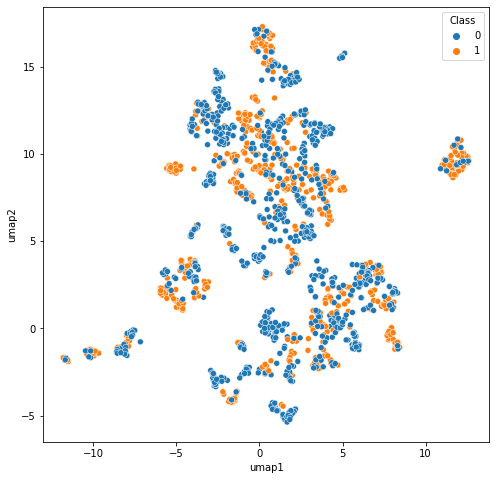

In [87]:
reducer = UMAP(random_state=42, n_components=2, n_neighbors=15, min_dist=0.5, metric="cosine")

embedding = reducer.fit_transform(bace_mole_8kle3.values)

gbt8k_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bace_mole_8kle3.index)
                          
gbt8k_umap = gbt8k_umap.join(bace_split_classes)                          
gbt8k_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=gbt8k_umap, x="umap1", y="umap2", hue="Class")

/home/roberto_olayo/miniconda3/envs/molclr/lib/python3.7/site-packages/umap/umap_.py:1804: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


<AxesSubplot:xlabel='umap1', ylabel='umap2'>

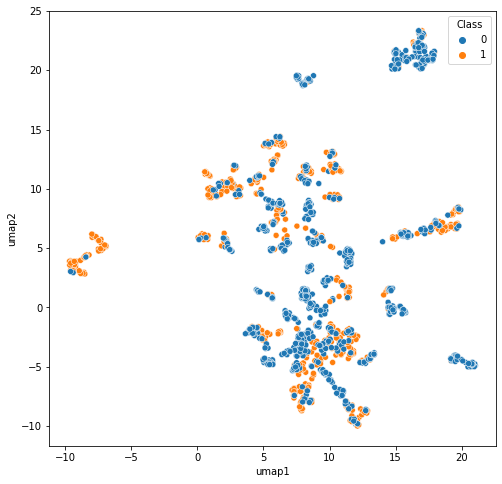

In [88]:
reducer = UMAP(random_state=42, n_components=2, n_neighbors=15, min_dist=0.5, metric="jaccard")

embedding = reducer.fit_transform(bace_mole_ecfp4.values)

ecfp4_umap = pd.DataFrame(data = embedding,
                          columns = ['umap1', 'umap2'], 
                          index = bace_mole_ecfp4.index)
                          
ecfp4_umap = ecfp4_umap.join(bace_split_classes)                          
ecfp4_umap.head()

plt.figure(figsize=(8, 8))
sns.scatterplot(data=ecfp4_umap, x="umap1", y="umap2", hue="Class")

In [89]:
ecfp4_umap["representation"] = "ECFP4"
ecfp4_umap["dataset"] = "BACE"
ecfp4_umap = ecfp4_umap.reset_index()

gbt8k_umap["representation"] = "MolE"
gbt8k_umap["dataset"] = "BACE"
gbt8k_umap = gbt8k_umap.reset_index()

bace_umap = pd.concat([ecfp4_umap, gbt8k_umap])
bace_umap.head()

,index,umap1,umap2,Class,representation,dataset
0,chem_0,11.302953,1.449072,1,ECFP4,BACE
1,chem_1,5.917876,13.799982,1,ECFP4,BACE
2,chem_2,1.458159,9.338639,1,ECFP4,BACE
3,chem_3,18.936333,6.830204,1,ECFP4,BACE
4,chem_4,1.576505,9.435716,1,ECFP4,BACE


In [90]:
representation_umap = pd.concat([bbbp_umap, bace_umap])
representation_umap.head()

,index,umap1,umap2,Class,representation,dataset
0,chem_0,13.229012,6.912014,1,ECFP4,BBBP
1,chem_1,11.129953,7.818325,1,ECFP4,BBBP
2,chem_2,17.112797,12.290708,1,ECFP4,BBBP
3,chem_3,12.010386,10.311732,1,ECFP4,BBBP
4,chem_4,5.063502,3.016152,1,ECFP4,BBBP


In [91]:
representation_umap.to_csv(os.path.join(OUTPUT_DIR, "representation_umap.csv"), index=False)